# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [2]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

Импортировали библиотеку и считали данные из файла, путь к которому прописали в двух вариантах, используя оператор для безопасного получения результата - `try...except`

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Вывели первые 20 строчек датафрейма на экран. Видим, что данные считались без ошибок, оцениваем наличие предсуществующих ошибок в данных (не связанных со считыванием их в переменную data). 
Видим:
- пропущенные значения
- некорректный формат представления данных (разный регистр, неправильный знак (отрицательные дни))

**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Промежуточный итог №1
Мы импортировали необходимую библиотеку, сохранили данные из датафрейма в переменной data и убедились, что все перенеслось хорошо, выведя первые 20 строчек датафрейма и информацию о нем.

## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Пропущенные значения имеются только в столбцах с общим стажем и общим доходом клиентов

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [7]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

Заменили пропуски в столбце с доходами на медианное по категориям

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

Привели формат дней к нормальному виду - перевели все отрицательные значения в положительные

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

Видим, что есть аномалии в количестве детей - их отрицательное количество `-1` и аномально большое `20`

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Удалили строки с аномальными количествами детей

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

Убедились, что теперь остались только строки с нормальным количеством детей. 

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Заменили пропуски в столбце со стажем работы на медианное по категориям

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Промежуточный итог №2
Все пропуски заполнены и аномальные данные удалены!

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

Заменили тип данных в графе общего дохода с вещественного на целочисленный

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

Привели столбец с образованием к нижнему регистру, чтобы было проще выяснить неявные дубликаты

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

Выявлен 71 дупликат после приведения к нижнему регистру

In [16]:
data = data.drop_duplicates()

Удаляем их

### Промежуточный итог №3
Все неявные дупликаты выявлены и удалены, а тип некоторых переменных изменен на требуемый

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Разделили клиентов на категории по уровню дохода для удобства работы с ними и добавили в новый столбец

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

Заметили, что:
- операции с автомобилем в своем содержании обязательно имеют строку `автом`, 
- операции с недвижимостью - `жил`, 
- проведение свадьбы - `свад`, 
- получение образования - `образов`, 
- все оставшиеся помечаем отсутствием категории: `нет категории`

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

Разделили клиентов на категории по цели кредита для удобства работы с ними и добавили в новый столбец

### Промежуточный итог №4
Провели лемматизацию клиентов по уровням дохода и по цели кредита, чтобы было проще работать с этими категориями и выявлять зависимости по ним

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

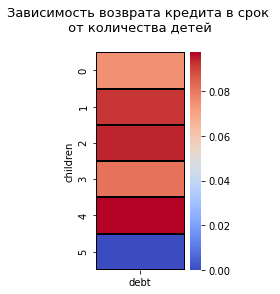

In [22]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (2, 4) 
plt.title('Зависимость возврата кредита в срок \n от количества детей \n', fontsize = 13)

sns.heatmap(data.groupby('children').agg({'debt':'mean'}), cmap="coolwarm", linewidths=1, linecolor='black')
plt.show()

In [23]:
data_children = data.groupby(['children']).agg({'debt': ['count', 'sum']})  # count показывает нам общее количество кредиторов - total_creditors
                                                                   # sum указывает нам на количество должников - debtors
        
data_children['debtors_percentage'] = data.groupby('children')['debt'].mean()*100  # процент неплательшиков -  debtors_percentage
data_children['debtors_percentage'] = data_children['debtors_percentage'].apply(lambda x: round(x,2)) #округляем значение процентов, чтобы было приятнее воспринимать
data_children = data_children.rename(columns = {'count':'total_creditors', 'sum':'debtors'}) # переименовываем технические столбцы для лучшего восприятия
data_children

debt         debtors_percentage
         total_creditors debtors                   
children                                           
0                  14091    1063               7.54
1                   4808     444               9.23
2                   2052     194               9.45
3                    330      27               8.18
4                     41       4               9.76
5                      9       0               0.00

**Вывод:** 
На графике представлена зависимость возврата кредита в срок от количества детей. Для его построения я использовал метод `heatmap` из библиотеки `seaborn`. 

>**Принцип**: основываясь на том, что столбец `dept`, указывающий на возврат кредита в срок, хранит два значения: `0` и `1`, где `0` - отсутствие задолженностей по кредиту, `1` -, соответственно, их наличие, я решил использовать среднее значение этого параметра для когорт, сгруппированных по количеству детей. 
**Чем ближе его значение к 0, тем больший процент людей этой когорты выплачивали кредит в срок.**

Имея в виду все вышеперечисленное, можно сделать вывод, что:
- люди, имеющие в своём арсенале 1, 2 и 4 ребенка выплачивают кредиты хуже, чем люди, имеющие ни одного, 3 или 5 детей
- люди, имеющие в своем арсенале 5 детей вообще выплачивали все кредиты вовремя

Исходя из этого можно сделать **вывод**, что существует зависимость возврата кредита в срок от количества детей, однако она не линейна и однозначно можно сказать только то, что семьи с пятью детьми выплачивали все кредиты вовремя, в то время как семьи, имеющие меньшее количество детей (вплоть до их отсутствия), хуже выплачивали кредиты.


**`НО есть один нюанс`**:

Если посмотреть на общее количество клиентов по каждой категории детей, мы видим, что клиентов, не имеющих детей, практически в два раза больше, чем тех, кто имеет хотя бы одного ребёнка, поэтому, возможно, какие-то конкретные выводы делать сложно из-за сильной неравномерности групп, а тем более если учитывать ,что клиентов, имеющих два ребенка, в 4 раза больше тех, кто имеет хотя бы трёх детей.

Можно попробовать сравнить две самые крупные разбивки: люди без детей и те, кто имеет хотя бы одного ребёнка:

In [24]:
def children_presence(children): # результат наличия детей у клиента
    if children >= 1:                 # если есть хотя бы один ребенок
        return 'client has children'  # возвращаем 'у клиента есть дети'
    else:                             # иначе (то есть, количество детей = 0)
        return 'client has no children'          # детей нет
    
data['children_presence'] = data['children'].apply(children_presence) # проверяем, есть ли хотя бы один ребенок у клиента и возвращаем значение в столбец children_presence
data_children_presence = data.groupby(['children_presence']).agg({'debt': ['count', 'sum']})  # count показывает нам общее количество кредиторов - total_creditors
                                                                   # sum указывает нам на количество должников - debtors
        
data_children_presence['debtors_percentage'] = data.groupby('children_presence')['debt'].mean()*100  # процент неплательшиков -  debtors_percentage
data_children_presence['debtors_percentage'] = data_children_presence['debtors_percentage'].apply(lambda x: round(x,2)) #округляем значение процентов, чтобы было приятнее воспринимать
data_children_presence = data_children_presence.rename(columns = {'count':'total_creditors', 'sum':'debtors'}) # переименовываем технические столбцы для лучшего восприятия
data_children_presence

debt         debtors_percentage
                       total_creditors debtors                   
children_presence                                                
client has children               7240     669               9.24
client has no children           14091    1063               7.54

**Вывод** из данной таблицы можно сформулировать следующим образом:
наличие детей у клиента снижает способность выплачивать кредит вовремя, но не сильно (опять же, разница в выборках в два раза, но это лучше, чем в прошлый раз)

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

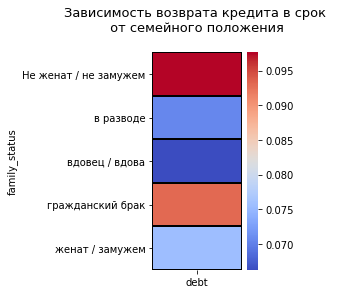

In [25]:
plt.title('Зависимость возврата кредита в срок \n от семейного положения \n', fontsize = 13)

sns.heatmap(data.groupby('family_status').agg({'debt':'mean'}), cmap="coolwarm", linewidths=1, linecolor='black')
plt.show()

In [26]:
data_family_status = data.groupby(['family_status']).agg({'debt': ['count', 'sum']})  # count показывает нам общее количество кредиторов - total_creditors
                                                                   # sum указывает нам на количество должников - debtors
        
data_family_status['debtors_percentage'] = data.groupby('family_status')['debt'].mean()*100  # процент неплательшиков -  debtors_percentage
data_family_status['debtors_percentage'] = data_family_status['debtors_percentage'].apply(lambda x: round(x,2)) #округляем значение процентов, чтобы было приятнее воспринимать
data_family_status = data_family_status.rename(columns = {'count':'total_creditors', 'sum':'debtors'}) # переименовываем технические столбцы для лучшего восприятия
data_family_status 

debt         debtors_percentage
                      total_creditors debtors                   
family_status                                                   
Не женат / не замужем            2796     273               9.76
в разводе                        1189      84               7.06
вдовец / вдова                    951      63               6.62
гражданский брак                 4134     385               9.31
женат / замужем                 12261     927               7.56

**Вывод:** 
На графике представлена зависимость возврата кредита в срок от семейного положения. Для его построения я использовал метод heatmap из библиотеки seaborn.

Принцип тот же, что и с детьми.

- люди, не вступавшие в брак или живущие в гражданском браке выплачивают кредиты хуже, чем люди, либо находящиеся в браке, либо разведенные или вдовцы

___Итоговый вывод можно сформулировать следующим образом___:
люди, не вступавшие в брачные отношения (если имеется в виду, что гражданский брак - это сожительство), хуже выплачивают кредиты, чем те, кто либо находятся в браке, либо бывшие в браке (разведенные, вдовцы), то есть возврат кредита вовремя зависит от семейного положения.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

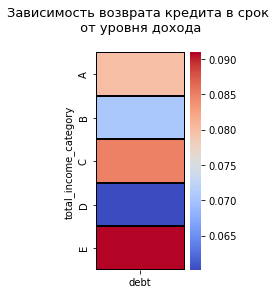

In [27]:
plt.title('Зависимость возврата кредита в срок \n от уровня дохода \n', fontsize = 13)

sns.heatmap(data.groupby('total_income_category').agg({'debt':'mean'}), cmap="coolwarm", linewidths=1, linecolor='black')
plt.show()

In [28]:
categories = {                     #формируем словарь с категориями
    'A': 'A: 0-30000',
    'B': 'B: 30001–50000',
    'C': 'C: 50001–200000',
    'D': 'D: 200001–1000000',
    'E': 'E: 1000001 и выше'
}

data_total_income_category = data.groupby(['total_income_category']).agg({'debt': ['count', 'sum']})  # count показывает нам общее количество кредиторов - total_creditors
                                                                   # sum указывает нам на количество должников - debtors
        
data_total_income_category['debtors_percentage'] = data.groupby('total_income_category')['debt'].mean() * 100  # процент неплательшиков -  debtors_percentage
data_total_income_category['debtors_percentage'] = data_total_income_category['debtors_percentage'].apply(lambda x: round(x,2)) #округляем значение процентов, чтобы было приятнее воспринимать

data_total_income_category = data_total_income_category.rename(index = categories) # переименовываем категории в соответствии со словарем

data_total_income_category = data_total_income_category.rename(columns = {'count':'total_creditors', 'sum':'debtors'}) # переименовываем технические столбцы для лучшего восприятия

data_total_income_category

debt         debtors_percentage
                      total_creditors debtors                   
total_income_category                                           
A: 0-30000                         25       2               8.00
B: 30001–50000                   5014     354               7.06
C: 50001–200000                 15921    1353               8.50
D: 200001–1000000                 349      21               6.02
E: 1000001 и выше                  22       2               9.09

**Вывод:** 

>Напомню разбивку на категории по уровню дохода:
>- 0–30000 — `'E'`;
>- 30001–50000 — `'D'`;
>- 50001–200000 — `'C'`;
>- 200001–1000000 — `'B'`;
>- 1000001 и выше — `'A'`.

*Наблюдаются следующие явления*:
- люди, имеющие самый низкий уровень дохода `'E'`, хуже всех выплачивают кредиты в срок
- люди, имеющие уровень дохода ниже среднего `'D'`, лучше всех выплачивают кредиты в срок 
- люди, имеющие самый высокий доход `'A'` и чуть поменьше - `'B'`, выплачивают кредиты чуть лучше, чем люди со средним уровнем дохода `'C'`

>Возможно, на это может влиять тот факт, что люди, имеющие высокий доход, будут брать более крупные кредиты, чем те, что имеют более низкий доход, а люди, имеющие самый низкий доход в принципе будут более подвержены невыплачиванию кредита в срок вследствие недостаточности средств к существованию, от чего проценты по кредиту будут разные, что может отражаться на выплачивании кредита в срок, но это только мои догадки. 

___Итоговый вывод можно сформулировать следующим образом___: связь между уровнем дохода и возвратом кредита в срок есть, не линейная, но есть.

Однако, можно заметить, что группы у нас распределены сильно неравномерно, поэтому попробуем проанализировать только две самые крупные из них:
- люди среднего уровня дохода `'C'`
- люди с доходом выше среднего `'B'`

Видно, что люди с доходом выше среднего реже допускают просрочку кредитов, чем люди со средним достатком.

Но можно сделать ещё **более наглядное представление**: разбить группы на (например) 4 одинаковые выборки по доходам и сравнить просрочку по платежам между ними:

In [29]:
total_income_quartiles = pd.qcut(data['total_income'], 4) # разбиваем выборку доходов на квартили
total_income_quartiles.unique() # смотрим, какие значения стоит выбрать в качестве границ

[(195842.0, 2265604.0], (107507.0, 142594.0], (142594.0, 195842.0], (20666.999, 107507.0]]
Categories (4, interval[float64]): [(20666.999, 107507.0] < (107507.0, 142594.0] < (142594.0, 195842.0] < (195842.0, 2265604.0]]

Построим новый столбец с категориями доходов клиентов, но уже разбитые на квартили, где:
- 0–105000 — `'Q4'`;
- 105001–140000 — `'Q3'`;
- 140001–200000 — `'Q2'`;
- 200001 и выше — `'Q1'`;

>Делаем разбивку приближенную к квартилям, но более удобоваримую читательскому глазу и немного смещаем границы в сторону круглых значений.

Создадим функцию, которая разобьёт доход на квартили по нашим границам:

In [30]:
def categorize_income_quartiles(income):
    try:
        if 0 <= income <= 110000:
            return 'Q4'
        elif 110001 <= income <= 145000:
            return 'Q3'
        elif 145001 <= income <= 200000:
            return 'Q2'
        elif income >= 200001:
            return 'Q1'
    except:
        pass

Теперь применяем её к столбцу дохода `total_income` и записываем значение в стобец `total_income_category_quartiles` и проверяем, сколько у нас получилось клиентов в каждом квартиле

In [31]:
data['total_income_category_quartiles'] = data['total_income'].apply(categorize_income_quartiles)
data['total_income_category_quartiles'].value_counts()

Q4    5617
Q3    5450
Q2    5225
Q1    5039
Name: total_income_category_quartiles, dtype: int64

Получили примерно одинаковые выборки! Теперь можно строить график и таблицу для анализа выплачиваемости кредита, но уже по квартилям доходов

In [32]:
quartiles = {                     #формируем словарь с категориями квартилей
    'Q4': 'Q4: 0-110000',
    'Q3': 'Q3: 110001–1450000',
    'Q2': 'Q2: 145001–200000',
    'Q1': 'Q1: 200001 и выше',
}

data_total_income_category_quartiles = data.groupby(['total_income_category_quartiles']).agg({'debt': ['count', 'sum']})  # count показывает нам общее количество кредиторов - total_creditors
                                                                   # sum указывает нам на количество должников - debtors
        
data_total_income_category_quartiles['debtors_percentage'] = data.groupby('total_income_category_quartiles')['debt'].mean() * 100  # процент неплательшиков -  debtors_percentage
data_total_income_category_quartiles['debtors_percentage'] = data_total_income_category_quartiles['debtors_percentage'].apply(lambda x: round(x,2)) #округляем значение процентов, чтобы было приятнее воспринимать

data_total_income_category_quartiles = data_total_income_category_quartiles.rename(index = quartiles) # переименовываем категории в соответствии со словарем

data_total_income_category_quartiles = data_total_income_category_quartiles.rename(columns = {'count':'total_creditors', 'sum':'debtors'}) # переименовываем технические столбцы для лучшего восприятия

data_total_income_category_quartiles

debt         debtors_percentage
                                total_creditors debtors                   
total_income_category_quartiles                                           
Q1: 200001 и выше                          5039     356               7.06
Q2: 145001–200000                          5225     443               8.48
Q3: 110001–1450000                         5450     478               8.77
Q4: 0-110000                               5617     455               8.10

**Вывод**

Видим, что после разбивки на квартили у нас выделяется (в хорошем смысле) только каста людей, чей доход начинается от 200000,- они лучше всех выплачивают кредиты. Все остальные категории примерно одинаково плохо выплачивают кредиты 

>Вообще разница не очень существенная получается, возможно, ей можно пренебречь и принять на веру тот факт, что квартили клиентов по доходам примерно одинаково выплачивают кредиты. 

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

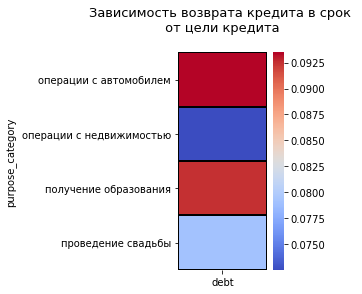

In [33]:
plt.title('Зависимость возврата кредита в срок \n от цели кредита \n', fontsize = 13)

sns.heatmap(data.groupby('purpose_category').agg({'debt':'mean'}), cmap="coolwarm", linewidths=1, linecolor='black')
plt.show()

In [34]:
data_purpose_category = data.groupby(['purpose_category']).agg({'debt': ['count', 'sum']})  # count показывает нам общее количество кредиторов - total_creditors
                                                                   # sum указывает нам на количество должников - debtors
        
data_purpose_category['debtors_percentage'] = data.groupby('purpose_category')['debt'].mean() * 100  # процент неплательшиков -  debtors_percentage
data_purpose_category['debtors_percentage'] = data_purpose_category['debtors_percentage'].apply(lambda x: round(x,2)) #округляем значение процентов, чтобы было приятнее воспринимать

data_purpose_category = data_purpose_category.rename(columns = {'count':'total_creditors', 'sum':'debtors'}) # переименовываем технические столбцы для лучшего восприятия

data_purpose_category

debt         debtors_percentage
                         total_creditors debtors                   
purpose_category                                                   
операции с автомобилем              4279     400               9.35
операции с недвижимостью           10751     780               7.26
получение образования               3988     369               9.25
проведение свадьбы                  2313     183               7.91

**Вывод:** 

- люди, берущие кредит на операции с автомобилем и получение образования, примерно одинаково хуже всех закрывают кредиты
- люди, берущие кредит на операции с недвижимостью, закрывают кредиты лучше всех

**Подытоживая вышесказанное**, можно сказать, что зависимость между целью кредита и возвратом его в срок есть.

Ниже приведу небольшую сводную таблицу, где по горизонтали отложены категории по уровню дохода, а по вертикали - цели кредита.

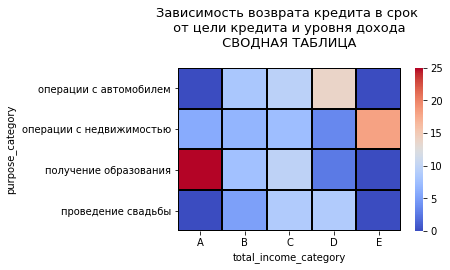

total_income_category,A,B,C,D,E
purpose_category,,,,,
операции с автомобилем,0.00,8.32,9.59,13.89,0.00
операции с недвижимостью,5.88,6.72,7.49,3.57,18.18
получение образования,25.00,7.75,9.85,2.67,0.00
проведение свадьбы,0.00,5.15,8.79,8.82,0.00


In [35]:
plt.rcParams['figure.figsize'] = (5, 3) 
plt.title('Зависимость возврата кредита в срок \n от цели кредита и уровня дохода \n СВОДНАЯ ТАБЛИЦА \n', fontsize = 13)

data_pivot = data.pivot_table(index = 'purpose_category', columns = 'total_income_category', values = 'debt', aggfunc = 'mean')*100 # процент неплательшиков -  debtors_percentage

data_pivot = data_pivot.apply(lambda x: round(x, 2)) #округляем значение процентов, чтобы было приятнее воспринимать
sns.heatmap(data_pivot, cmap="coolwarm", linewidths=1, linecolor='black')
plt.show()
data_pivot

Видно, что есть категории по уровню дохода, которые выплачивали абсолютно все кредиты в некоторых категориях по цели кредита (в графе задолженностей у них стоит 0).
Необходимо проверить, вдруг этих целей у них просто не было:

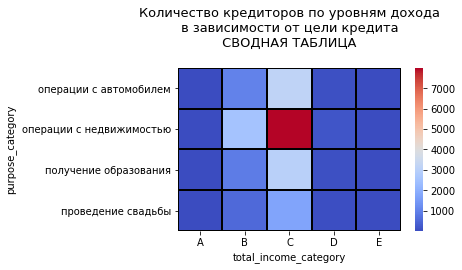

total_income_category,A,B,C,D,E
purpose_category,,,,,
операции с автомобилем,2,1022,3181,72,2
операции с недвижимостью,17,2558,7997,168,11
получение образования,4,890,3014,75,5
проведение свадьбы,2,544,1729,34,4


In [36]:
plt.rcParams['figure.figsize'] = (5, 3) 
plt.title('Количество кредиторов по уровням дохода\n в зависимости от цели кредита \n СВОДНАЯ ТАБЛИЦА \n', fontsize = 13)
data_pivot = data.pivot_table(index = 'purpose_category', columns = 'total_income_category', values = 'debt', aggfunc = 'count')

sns.heatmap(data_pivot, cmap="coolwarm", linewidths=1, linecolor='black')
plt.show()
data_pivot

Видим, что нет ни одной категории по цели кредита, где люди разных категорий по уровню дохода не брали бы кредиты, поэтому `нули` в сводной таблице по `зависимости возврата кредита от уровня дохода и цели кредита` мы смело можем считать как **стопроцентную** `выплату долгов вовремя`.

Видим, что лучше всего возвращаются кредиты на получение образования людьми, имеющие самый низкий доход `'E'`. Если вообще брать людей по категориям дохода, то хуже всего выплачивают кредиты люди с самым низким уровнем дохода - `'E'`. 

Если оценить ситуацию целом, можно сказать, что **есть зависимость по выплате кредитов в срок как от уровня дохода, так и от цели кредита**, что было только подтверждено этой таблицей.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 

- нежелание клиента раскрывать данные
- невозможность получить данные
- технические ошибки при (возможно) расчетах (общий трудовой стаж в днях)

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 

дело в том, медианное значение гораздо точнее отражает меру центральной тенденции, чем среднее значение, так как среднее значение сильно сдвигается при наличии выбросов - значений параметра, которые несоизмеримо большие или маленькие по сравнению со средним значением без них

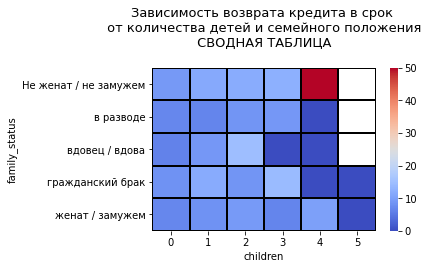

children,0,1,2,3,4,5
family_status,,,,,,
Не женат / не замужем,9.28,11.58,12.00,12.50,50.00,NaN
в разводе,7.02,6.73,8.64,9.09,0.00,NaN
вдовец / вдова,6.26,9.09,15.00,0.00,0.00,NaN
гражданский брак,8.39,11.86,8.75,14.29,0.00,0.0
женат / замужем,6.91,8.27,9.46,6.83,10.34,0.0


In [37]:
plt.rcParams['figure.figsize'] = (5, 3) 
plt.title('Зависимость возврата кредита в срок \n от количества детей и семейного положения \n СВОДНАЯ ТАБЛИЦА \n', fontsize = 13)

data_pivot = data.pivot_table(index = 'family_status', columns = 'children', values = 'debt', aggfunc = 'mean') * 100 # процент неплательшиков -  debtors_percentage
data_pivot = data_pivot.apply(lambda x: round(x, 2)) #округляем значение процентов, чтобы было приятнее воспринимать
sns.heatmap(data_pivot, cmap="coolwarm", linewidths=1, linecolor='black')
plt.show()

data_pivot

**Немного дополнительной аналитики**

В таблице выше рассмотрена зависимость выплачиваемости кредита от сводки семейного положения и детей.
>Данную таблицу добавил только для наглядного представления исходного вопроса исследования, сам анализ проводил на отдельных срезах по семейному положению и по количеству детей.

Видно, что чем больше детей, тем лучше факт погашения кредита вовремя (**однако** хуже всего выплачивают кредиты люди, находящиеся в статусе `не женат/не замужем` и имеющие `4` ребёнка.

Если смотреть по данным срезам, выявляется слабая связь факта выплачивания кредита вовремя и семейного статуса клиента.

### Шаг 4: общий вывод.

Мы провели большую работу по предобработке исходных данных: избавились от пропусков, дупликатов, изменили тип некоторых данных, а также произвели их категоризацию.
После этого, для ответа на поставленные вопросы, мы произвели расчет выплачиваемости кредитов вовремя для различных категорий и выывели результат данных расчетов в виде графиков `heatmap`. 

1. `Зависимость выплачиваемости кредитов от количества детей`
    1. люди, имеющие в своём арсенале 1, 2 и 4 ребенка выплачивают кредиты хуже, чем люди, имеющие ни одного, 3 или 5 детей
    2. люди, имеющие в своем арсенале 5 детей вообще выплачивали все кредиты вовремя

    **Итоговый вывод можно сформулировать следующим образом**: существует зависимость возврата кредита в срок от количества детей, однако она не линейна и однозначно можно сказать только то, что семьи с пятью детьми выплачивали все кредиты вовремя, в то время как семьи, имеющие меньшее количество детей (вплоть до их отсутствия), хуже выплачивали кредиты.

     <b>⚠️**Вывод 1 UPDATE** `Зависимость выплачиваемости кредитов от наличия/отсутствия детей`</b>
     
     Если посмотреть на общее количество клиентов по каждой категории детей, мы видим, что `клиентов, не имеющих детей, практически в два раза больше, чем тех, кто имеет хотя бы одного ребёнка`, поэтому, возможно, какие-то `конкретные выводы делать сложно из-за сильной неравномерности групп`, а тем более если учитывать ,что клиентов, имеющих два ребенка, в 4 раза больше тех, кто имеет хотя бы трёх детей. Если попробовать сравнить `две самые крупные разбивки`: люди `без детей` и те, кто имеет `хотя бы одного ребёнка`, то получаем:
     
    **Дополнительный итоговый вывод можно сформулировать следующим образом**: наличие детей у клиента снижает способность выплачивать кредит вовремя, но не сильно (опять же, разница в выборках в два раза, но это лучше, чем в прошлый раз)
    

2. `Зависимость выплачиваемости кредитов от семейного статуса`
      
    **Итоговый вывод можно сформулировать следующим образом**: люди, не вступавшие в брачные отношения (если имеется в виду, что гражданский брак - это сожительство), хуже выплачивают кредиты, чем те, кто либо находятся в браке, либо бывшие в браке (разведенные, вдовцы), то есть возврат кредита вовремя зависит от семейного положения.
    
    
3. `Зависимость выплачиваемости кредитов от уровня дохода`

    1. люди, имеющие самый низкий уровень дохода `'E'`, хуже всех выплачивают кредиты в срок
    2. люди, имеющие уровень дохода ниже среднего `'D'`, лучше всех выплачивают кредиты в срок
    3. люди, имеющие самый высокий доход `'A'` и чуть поменьше - `'B'`, выплачивают кредиты чуть лучше, чем люди со средним уровнем дохода `'C'`

    **Итоговый вывод можно сформулировать следующим образом**: связь между уровнем дохода и возвратом кредита в срок есть, не линейная, но есть.
    
    Однако группы у нас распределены сильно неравномерно, поэтому попробуем проанализировать только две самые крупные из них:
- люди среднего уровня дохода `'C'`
- люди с доходом выше среднего `'B'`

    Видно, что люди с доходом выше среднего реже допускают просрочку кредитов, чем люди со средним достатком.
    
    <b>⚠️**Вывод 3 UPDATE** `Зависимость выплачиваемости кредитов от уровня дохода по квартилям`</b>

    Для более наглядного представления результатов нам надо добиться более высокой однородности категорий, поэтому разделим их на `4 примерно одинаковые группы - квартили` и также проанализируем. Видим, что после разбивки на квартили у нас выделяется (в хорошем смысле) только каста людей, чей `доход начинается от 200000`,- они `лучше всех выплачивают кредиты`. Все остальные категории примерно одинаково плохо выплачивают кредиты

    >Вообще разница не очень существенная получается, возможно, ей можно пренебречь и принять на веру тот факт, что квартили клиентов по доходам примерно одинаково выплачивают кредиты.
    

4. `Зависимость выплачиваемости кредитов от цели кредита`
    1. люди, берущие кредит на операции с автомобилем и получение образования, примерно одинаково хуже всех закрывают кредиты
    2. люди, берущие кредит на операции с недвижимостью, закрывают кредиты лучше всех
    
    **Итоговый вывод можно сформулировать следующим образом**: зависимость между целью кредита и возвратом его в срок есть.


5. Если построить сводную таблицу из семейного положения и количества детей и проследить связь её с выплачиваемостью кредитов, получаем:
    1. Если детей в семье 4 или 5, выплачиваемость кредита будет выше, чем у кредиторов, где их меньше
    2. В данных срезах прослеживается слабая связь между выплачиваемостью кредитов и семейным положением
    3. Хуже всего выплачивают кредит люди, находящиеся в статусе `не женат/не замужем` и имеющие `4` ребёнка.

Исходя из всего вышеперечисленного, ответ на поставленный заказчиком вопрос следующий: семейное положение и количество детей влияет на факт погашения кредита в срок, характер зависимости описан в выводах, представленных чуть выше.

Данную информацию можно учитывать при рассмотрении заявки клиента на кредит и корректировать либо решение по выдаче кредита, либо по размеру выдаваемого клиенту кредита.